In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings                         
warnings.filterwarnings("ignore")

# Set to display all columns
pd.set_option('display.max_columns', None)
chicago_flights = pd.read_csv('../data/chicago_flights.csv')
chicago_flights

,year,quarter,month,dayofmonth,dayofweek,flightdate,reporting_airline,dot_id_reporting_airline,iata_code_reporting_airline,tail_number,flight_number_reporting_airline,originairportid,originairportseqid,origincitymarketid,origin,origincityname,originstate,originstatefips,originstatename,originwac,destairportid,destairportseqid,destcitymarketid,dest,destcityname,deststate,deststatefips,deststatename,destwac,crsdeptime,deptime,depdelay,depdelayminutes,depdel15,departuredelaygroups,deptimeblk,taxiout,wheelsoff,wheelson,taxiin,crsarrtime,arrtime,arrdelay,arrdelayminutes,arrdel15,arrivaldelaygroups,arrtimeblk,cancelled,cancellationcode,diverted,crselapsedtime,actualelapsedtime,airtime,flights,distance,distancegroup,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,firstdeptime,totaladdgtime,longestaddgtime,divairportlandings,divreacheddest,divactualelapsedtime,divarrdelay,divdistance,divairport
0,2013,1,1,19,6,2013-01-19,9E,20363,9E,N901XJ,3498,13930,1393002,30977,ORD,"Chicago, IL",IL,17,Illinois,41,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1505,1454,-11,0,0,-1,1500-1559,65,1559,1849,7,1823,1856,33,33,1,2,1800-1859,0,0,0,138,182,110,1,740,3,0,0,33,0,0,0,0,0,0,0,0,0,0,0
1,2013,1,1,20,7,2013-01-20,9E,20363,9E,N922XJ,3498,13930,1393002,30977,ORD,"Chicago, IL",IL,17,Illinois,41,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1505,1505,0,0,0,0,1500-1559,14,1519,1752,13,1825,1805,-20,0,0,-2,1800-1859,0,0,0,140,120,93,1,740,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2013,1,1,21,1,2013-01-21,9E,20363,9E,N925XJ,3498,13930,1393002,30977,ORD,"Chicago, IL",IL,17,Illinois,41,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1505,1500,-5,0,0,-1,1500-1559,13,1513,1753,8,1825,1801,-24,0,0,-2,1800-1859,0,0,0,140,121,100,1,740,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2013,1,1,22,2,2013-01-22,9E,20363,9E,N925XJ,3498,13930,1393002,30977,ORD,"Chicago, IL",IL,17,Illinois,41,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1505,1500,-5,0,0,-1,1500-1559,13,1513,1755,8,1825,1803,-22,0,0,-2,1800-1859,0,0,0,140,123,102,1,740,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2013,1,1,23,3,2013-01-23,9E,20363,9E,N903XJ,3498,13930,1393002,30977,ORD,"Chicago, IL",IL,17,Illinois,41,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1505,1503,-2,0,0,-1,1500-1559,59,1602,1839,10,1825,1849,24,24,1,1,1800-1859,0,0,0,140,166,97,1,740,3,0,0,24,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59397,2013,1,1,7,1,2013-01-07,WN,19393,WN,N956WN,202,13232,1323202,30977,MDW,"Chicago, IL",IL,17,Illinois,41,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,630,627,-3,0,0,-1,0600-0659,18,645,840,6,900,846,-14,0,0,-1,0900-0959,0,0,0,270,259,235,1,1750,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59398,2013,1,1,7,1,2013-01-07,WN,19393,WN,N8307K,207,13232,1323202,30977,MDW,"Chicago, IL",IL,17,Illinois,41,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,850,855,5,5,0,0,0800-0859,11,906,1054,5,1125,1059,-26,0,0,-2,1100-1159,0,0,0,275,244,228,1,1750,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59399,2013,1,1,7,1,2013-01-07,WN,19393,WN,N8309C,820,13232,1323202,30977,MDW,"Chicago, IL",IL,17,Illinois,41,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,1920,1945,25,25,1,1,1900-1959,10,1955,2145,7,2150,2152,2,2,0,0,2100-2159,0,0,0,270,247,230,1,1750,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59400,2013,1,1,7,1,2013-01-07,WN,19393,WN,N738CB,2532,13232,1323202,30977,MDW,"Chicago, IL",IL,17,Illinois,41,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,1410,1416,6,6,0,0,1400-1459,9,1425,1622,5,1640,1627,-13,0,0,-1,1600-1659,0,0,0,270,251,237,1,1750,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2]:
airline = pd.read_csv('../data/airline_id.csv')
airline

,code,description
0,20100,Polar Air Cargo Airways: PO
1,20101,Southern Frontier Air Trans: SFQ (1)
2,20102,Pacific International Airlines Inc.: SFQ
3,20103,North East Cargo Airlines: NEQ
4,20104,Transaero Airlines: UN
...,...,...
1554,20004,Cal Air International Ltd.: BR (1)
1555,20005,Eva Airways Corporation: BR
1556,20006,Capitol Air Express Inc.: CPQ
1557,20007,Atlas Air Inc.: 5Y


In [3]:
aircraft = pd.read_csv('../data/aircraft.csv')
aircraft

,tail_number,manufacturer,model
0,N789SW,Boeing,B-737-7H4
1,N198UW,Airbus,A321-211
2,N681UP,Boeing,B747-1
3,N54711,Boeing,B737-700PAX
4,N390SW,Boeing,B-737-3H4
...,...,...,...
13096,N923TW,McDonnell-Douglas,SUPER80PASSENGER
13097,N379WN,Boeing,737-300PASSENGERONLY
13098,N821NN,Boeing,B737-823PASSENGER
13099,N247LR,Bombardier,CRJ-900-PSGR


In [4]:
chicago_flights = pd.merge(chicago_flights, aircraft, on='tail_number', how='left')

In [5]:
# Assuming chicago_flights, df_airlines, and aircraft_df are your initial DataFrames

# Step 1: Merge Aircraft Details
chicago_flights = pd.merge(chicago_flights, aircraft, on='tail_number', how='left')

# Step 2: Merge Airline Descriptions
chicago_flights = pd.merge(chicago_flights, airline, left_on='dot_id_reporting_airline', right_on='code', how='left')

# Calculate cancellation rates
chicago_flights['cancelled_rate'] = chicago_flights['cancelled'].astype(float)

# Calculate delay rates
chicago_flights['delay_rate'] = chicago_flights['depdel15'].astype(float)  # Assuming 'depdel15' indicates a delay of 15 mins or more
chicago_flights


,year,quarter,month,dayofmonth,dayofweek,flightdate,reporting_airline,dot_id_reporting_airline,iata_code_reporting_airline,tail_number,flight_number_reporting_airline,originairportid,originairportseqid,origincitymarketid,origin,origincityname,originstate,originstatefips,originstatename,originwac,destairportid,destairportseqid,destcitymarketid,dest,destcityname,deststate,deststatefips,deststatename,destwac,crsdeptime,deptime,depdelay,depdelayminutes,depdel15,departuredelaygroups,deptimeblk,taxiout,wheelsoff,wheelson,taxiin,crsarrtime,arrtime,arrdelay,arrdelayminutes,arrdel15,arrivaldelaygroups,arrtimeblk,cancelled,cancellationcode,diverted,crselapsedtime,actualelapsedtime,airtime,flights,distance,distancegroup,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,firstdeptime,totaladdgtime,longestaddgtime,divairportlandings,divreacheddest,divactualelapsedtime,divarrdelay,divdistance,divairport,manufacturer_x,model_x,manufacturer_y,model_y,code,description,cancelled_rate,delay_rate
0,2013,1,1,19,6,2013-01-19,9E,20363,9E,N901XJ,3498,13930,1393002,30977,ORD,"Chicago, IL",IL,17,Illinois,41,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1505,1454,-11,0,0,-1,1500-1559,65,1559,1849,7,1823,1856,33,33,1,2,1800-1859,0,0,0,138,182,110,1,740,3,0,0,33,0,0,0,0,0,0,0,0,0,0,0,Bombardier,RJ-900,Bombardier,RJ-900,20363,Endeavor Air Inc.: 9E,0.0,0.0
1,2013,1,1,20,7,2013-01-20,9E,20363,9E,N922XJ,3498,13930,1393002,30977,ORD,"Chicago, IL",IL,17,Illinois,41,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1505,1505,0,0,0,0,1500-1559,14,1519,1752,13,1825,1805,-20,0,0,-2,1800-1859,0,0,0,140,120,93,1,740,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bombardier,RJ-900,Bombardier,RJ-900,20363,Endeavor Air Inc.: 9E,0.0,0.0
2,2013,1,1,21,1,2013-01-21,9E,20363,9E,N925XJ,3498,13930,1393002,30977,ORD,"Chicago, IL",IL,17,Illinois,41,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1505,1500,-5,0,0,-1,1500-1559,13,1513,1753,8,1825,1801,-24,0,0,-2,1800-1859,0,0,0,140,121,100,1,740,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bombardier,RJ-900,Bombardier,RJ-900,20363,Endeavor Air Inc.: 9E,0.0,0.0
3,2013,1,1,22,2,2013-01-22,9E,20363,9E,N925XJ,3498,13930,1393002,30977,ORD,"Chicago, IL",IL,17,Illinois,41,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1505,1500,-5,0,0,-1,1500-1559,13,1513,1755,8,1825,1803,-22,0,0,-2,1800-1859,0,0,0,140,123,102,1,740,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bombardier,RJ-900,Bombardier,RJ-900,20363,Endeavor Air Inc.: 9E,0.0,0.0
4,2013,1,1,23,3,2013-01-23,9E,20363,9E,N903XJ,3498,13930,1393002,30977,ORD,"Chicago, IL",IL,17,Illinois,41,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,1505,1503,-2,0,0,-1,1500-1559,59,1602,1839,10,1825,1849,24,24,1,1,1800-1859,0,0,0,140,166,97,1,740,3,0,0,24,0,0,0,0,0,0,0,0,0,0,0,Bombardier,RJ-900,Bombardier,RJ-900,20363,Endeavor Air Inc.: 9E,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59397,2013,1,1,7,1,2013-01-07,WN,19393,WN,N956WN,202,13232,1323202,30977,MDW,"Chicago, IL",IL,17,Illinois,41,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,630,627,-3,0,0,-1,0600-0659,18,645,840,6,900,846,-14,0,0,-1,0900-0959,0,0,0,270,259,235,1,1750,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Boeing,B-737-7H4,Boeing,B-737-7H4,19393,Southwest Airlines Co.: WN,0.0,0.0
59398,2013,1,1,7,1,2013-01-07,WN,19393,WN,N8307K,207,13232,1323202,30977,MDW,"Chicago, IL",IL,17,Illinois,41,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,850,855,5,5,0,0,0800-0859,11,906,1054,5,1125,1059,-26,0,0,-2,1100-1159,0,0,0,275,244,228,1,1750,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Boeing,B-737-8H4,Boeing,B-737-8H4,19393,Southwest Airlines Co.: WN,0.0,0.0
59399,2013,1,1,7,1,2013-01-07,WN,19393,WN,N8309C,820,13232,1323202,30977,MDW,"Chicago, IL",IL,17,Illinois,

In [6]:
# Step 3: Group by airline and aircraft type to calculate average rates
comparison_df = chicago_flights.groupby(['description', 'manufacturer_x', 'model_x', 'iata_code_reporting_airline']).agg(
    avg_cancelled=pd.NamedAgg(column='cancelled_rate', aggfunc='mean'),
    avg_delay=pd.NamedAgg(column='delay_rate', aggfunc='mean')
).reset_index()

comparison_df

,description,manufacturer_x,model_x,iata_code_reporting_airline,avg_cancelled,avg_delay
0,AirTran Airways Corporation: FL,Boeing,B717-200-psgr,FL,0.000000,0.000000
1,AirTran Airways Corporation: FL,Boeing,B737-700-psgr,FL,0.000000,0.153846
2,AirTran Airways Corporation: FL,Boeing,Boeing717-200,FL,0.004695,0.046948
3,AirTran Airways Corporation: FL,Boeing,Boeing737-700/LR,FL,0.017544,0.149123
4,Alaska Airlines Inc.: AS,Boeing,B737-790ALLPAX,AS,0.000000,0.000000
...,...,...,...,...,...,...
100,United Air Lines Inc.: UA,Boeing,B777-222BPAX,UA,0.000000,0.300000
101,United Air Lines Inc.: UA,Boeing,B777-222PAX,UA,0.000000,0.205882
102,United Air Lines Inc.: UA,Boeing,B787-800PAX,UA,0.000000,0.409091
103,Virgin America: VX,Airbus,A319-112,VX,0.000000,0.132530


In [7]:
comparison_df.rename(columns={'model_x': 'model'}, inplace=True)
comparison_df.rename(columns={'manufacturer_x': 'manufacturer'}, inplace=True)

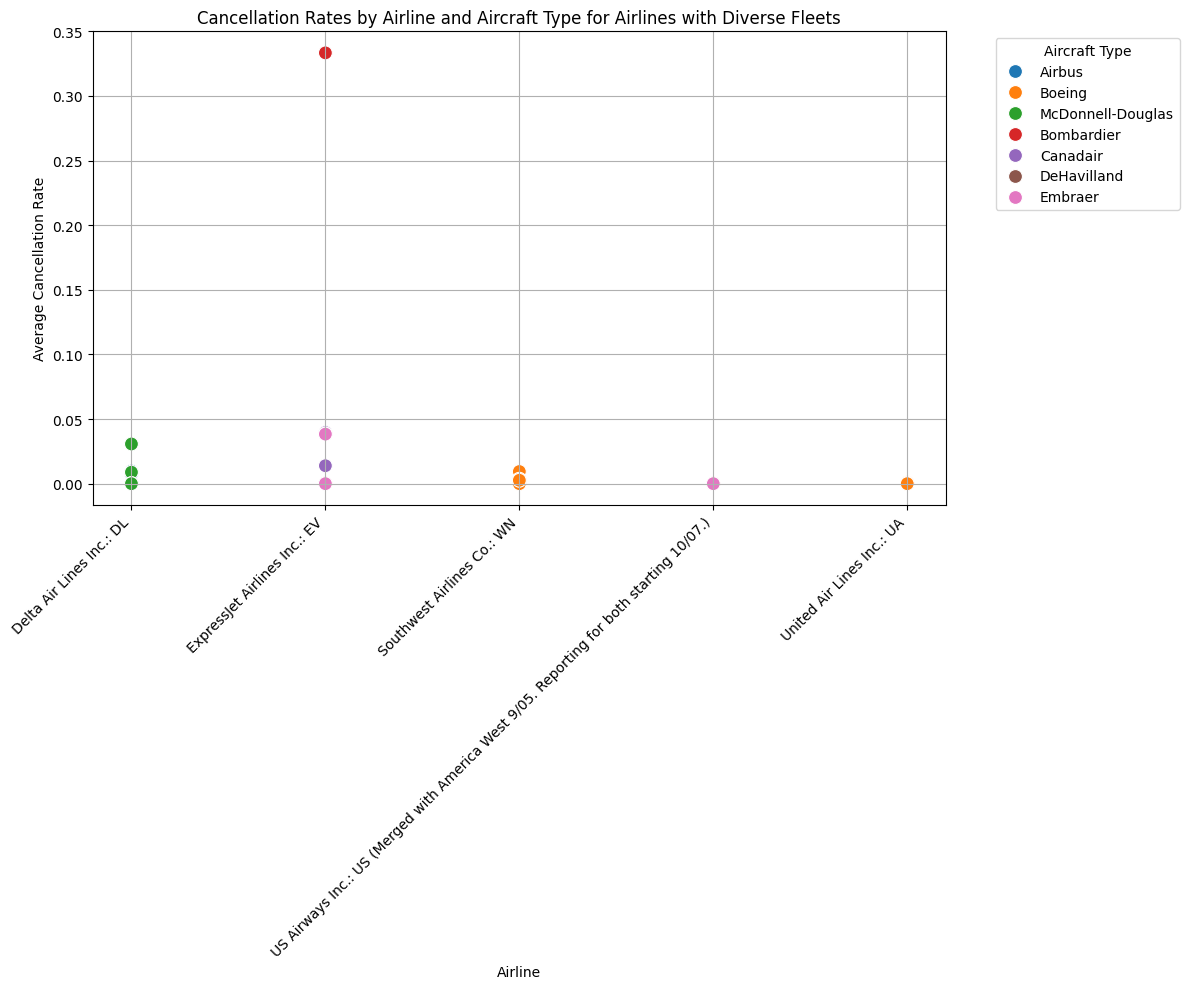

In [8]:
# Count the unique aircraft models for each airline
airline_aircraft_counts = chicago_flights.groupby('description')['model_x'].nunique()

# Select airlines with the highest count of unique aircraft models, e.g., the top 5
top_airlines_by_fleet_diversity = airline_aircraft_counts.nlargest(5).index

# Filter the comparison_df to only include these airlines
top_fleet_diversity_df = comparison_df[comparison_df['description'].isin(top_airlines_by_fleet_diversity)]

plt.figure(figsize=(12, 10))
sns.scatterplot(data=top_fleet_diversity_df, x='description', y='avg_cancelled', hue='manufacturer', s=100)

plt.title('Cancellation Rates by Airline and Aircraft Type for Airlines with Diverse Fleets')
plt.xlabel('Airline')
plt.ylabel('Average Cancellation Rate')
plt.legend(title='Aircraft Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate the labels and align them to the right

plt.grid(True)
plt.tight_layout()  # Adjust layout to make sure everything fits without overlap
plt.show()

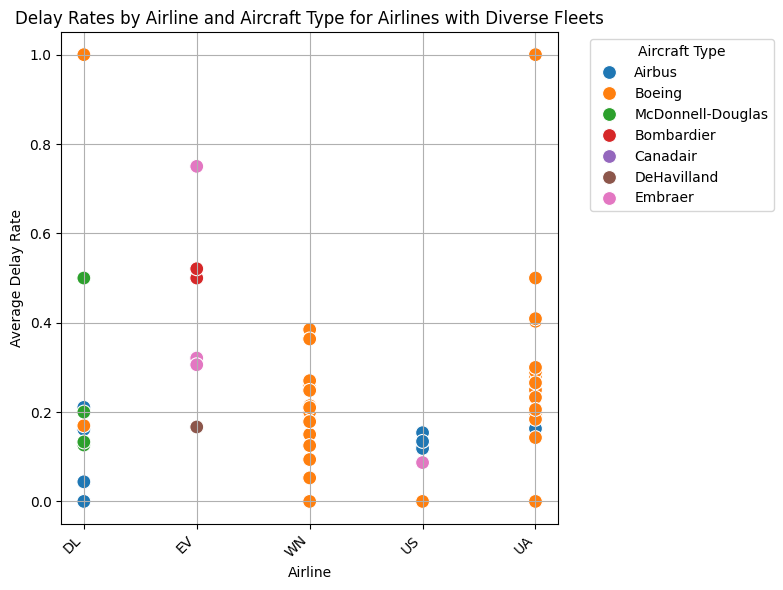

In [9]:
# Count the unique aircraft models for each airline
airline_aircraft_counts = chicago_flights.groupby('description')['model_x'].nunique()

# Select airlines with the highest count of unique aircraft models, e.g., the top 5
top_airlines_by_fleet_diversity = airline_aircraft_counts.nlargest(5).index

# Filter the comparison_df to only include these airlines
top_fleet_diversity_df = comparison_df[comparison_df['description'].isin(top_airlines_by_fleet_diversity)]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=top_fleet_diversity_df, x='iata_code_reporting_airline', y='avg_delay', hue='manufacturer', s=100)

plt.title('Delay Rates by Airline and Aircraft Type for Airlines with Diverse Fleets')
plt.xlabel('Airline')
plt.ylabel('Average Delay Rate')
plt.legend(title='Aircraft Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate the labels and align them to the right

plt.grid(True)
plt.tight_layout()  # Adjust layout to make sure everything fits without overlap
plt.show()

In [10]:
top_fleet_diversity_df

,description,manufacturer,model,iata_code_reporting_airline,avg_cancelled,avg_delay
13,Delta Air Lines Inc.: DL,Airbus,A319-114-PSGR,DL,0.000000,0.000000
14,Delta Air Lines Inc.: DL,Airbus,A319-PSGR,DL,0.009756,0.043902
15,Delta Air Lines Inc.: DL,Airbus,A320-211-PSGR,DL,0.000000,0.210526
16,Delta Air Lines Inc.: DL,Airbus,A320-212-PSGR,DL,0.000000,0.161290
17,Delta Air Lines Inc.: DL,Airbus,A320-PSGR,DL,0.007273,0.130909
...,...,...,...,...,...,...
98,United Air Lines Inc.: UA,Boeing,B767-400PAX,UA,0.000000,0.142857
99,United Air Lines Inc.: UA,Boeing,B777-200PAX,UA,0.000000,0.500000
100,United Air Lines Inc.: UA,Boeing,B777-222BPAX,UA,0.000000,0.300000
101,United Air Lines Inc.: UA,Boeing,B777-222PAX,UA,0.000000,0.205882
